In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tree_functions as tree
import imp
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

In [43]:
galton = pd.read_csv('galton_height.csv')

In [44]:
galton

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


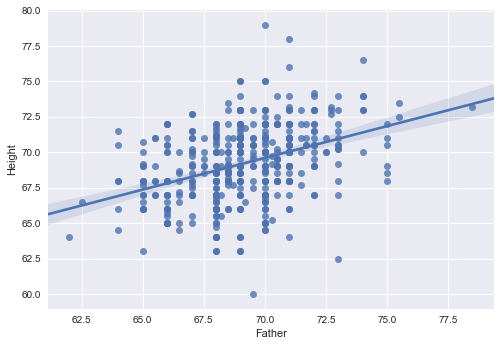

In [45]:
sns.regplot(galton.loc[galton.Gender == 'M'].Father, galton.loc[galton.Gender == 'M'].Height)

In [46]:
galton.loc[galton.Gender == 'M'].Father.corr(galton.loc[galton.Gender == 'M'].Height)

0.3913173581417897

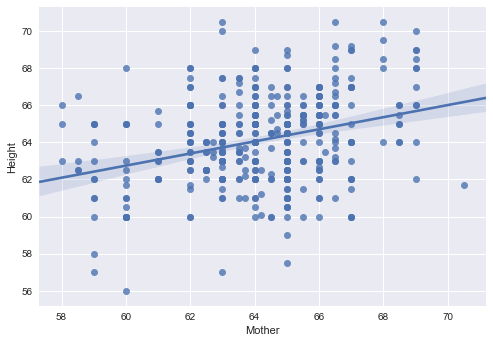

In [47]:
sns.regplot(galton.loc[galton.Gender == 'F'].Mother, galton.loc[galton.Gender == 'F'].Height)

In [48]:
galton.loc[galton.Gender == 'F'].Mother.corr(galton.loc[galton.Gender == 'F'].Height)

0.313698353531348

In [49]:
galton

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


In [ ]:
def normalize(row):
    if row.Gender == 'M':
        return (row.Height - son_mean) / son_sd
    elif row.Gender == 'F':
        return (row.Height - daughter_mean) / daughter_sd

In [50]:
# no multi-counting
father_distribution = galton.groupby(['Family'], sort=False).Father.mean()
mother_distribution = galton.groupby(['Family'], sort=False).Mother.mean()

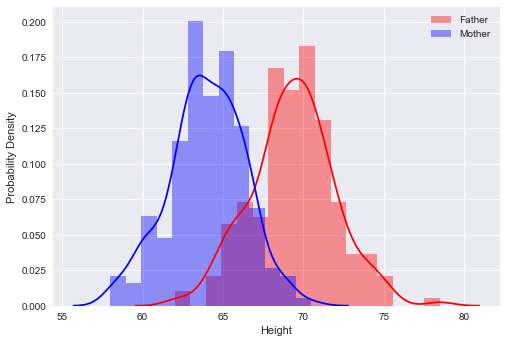

In [51]:
sns.distplot(father_distribution, label='Father', color='red')
sns.distplot(mother_distribution, label='Mother', color='blue')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### Parent descriptors

In [52]:
# true values, no multi-counting
print(father_distribution.mean(), father_distribution.std())  
print(mother_distribution.mean(), mother_distribution.std())

69.34923857868021 2.622034170789886
63.98426395939087 2.3556068786418183


In [53]:
# counts multiple times (as many as the number of offspring)
father_mean = galton.Father.mean()  
father_sd = galton.Father.std()

In [54]:
print(father_mean, father_sd)

69.23285077950997 2.4702558107108206


In [55]:
mother_mean = galton.Mother.mean()
mother_sd = galton.Mother.std()

In [56]:
print(mother_mean, mother_sd)

64.08440979955456 2.3070252210018625


### Offspring descriptors

In [57]:
son_distribution = galton.loc[galton.Gender == 'M'].Height
daughter_distribution = galton.loc[galton.Gender == 'F'].Height

In [58]:
son_mean = galton.loc[galton.Gender == 'M'].Height.mean()
son_sd = galton.loc[galton.Gender == 'M'].Height.std()

In [59]:
print(son_mean, son_sd)

69.22881720430114 2.6315942826866188


In [60]:
daughter_mean = galton.loc[galton.Gender == 'F'].Height.mean()
daughter_sd = galton.loc[galton.Gender == 'F'].Height.std()

In [61]:
print(daughter_mean, daughter_sd)

64.11016166281759 2.370319602944069


### Naive offspring r sub s

In [62]:
# standard deviations of the individual distributions
son_sds = galton.loc[galton.Gender == 'M'].groupby(['Family'], sort=False).Height.std()
daughter_sds = galton.loc[galton.Gender == 'F'].groupby(['Family'], sort=False).\
                        Height.std()

In [63]:
son_sds.mean(), son_sds.median()

(1.6928601601893907, 1.5275252316519485)

In [64]:
daughter_sds.mean(), daughter_sds.median()

(1.4968470911127525, 1.4142135623730951)

In [65]:
son_sds.mean() / father_sd

0.6852975116379818

In [66]:
daughter_sds.mean() / mother_sd

0.6488212948373069

In [67]:
galton_norm = pd.DataFrame()

galton_norm = pd.DataFrame((galton['Father'] - father_mean) / father_sd)

galton_norm['Mother'] = (galton['Mother'] - mother_mean) / mother_sd

galton_norm['Parent'] = (galton_norm.Father + galton_norm.Mother) / 2
galton_norm['Offspring'] = galton.apply(normalize, axis='columns')

### Better offspring r sub s

In [68]:

galton['NormHeight'] = galton.apply(normalize, axis='columns')

In [69]:
offspring_sds = galton.groupby(['Family'], sort=False).NormHeight.std()

In [70]:
offspring_sds.median(), offspring_sds.mean()

(0.6692042056467554, 0.6873125038392203)

In [71]:
galton_norm.Parent.std()

0.7326884096058295

In [72]:
offspring_sds.median() / galton_norm.Parent.std()

0.9133544312605857

In [73]:
offspring_sds.mean() / galton_norm.Parent.std()

0.9380693004397047

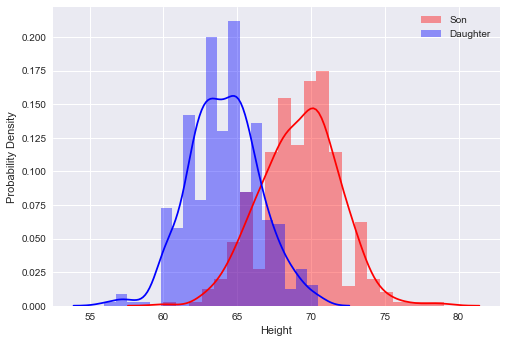

In [74]:
sns.distplot(son_distribution, label='Son', color='red')
sns.distplot(daughter_distribution, label='Daughter', color='blue')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

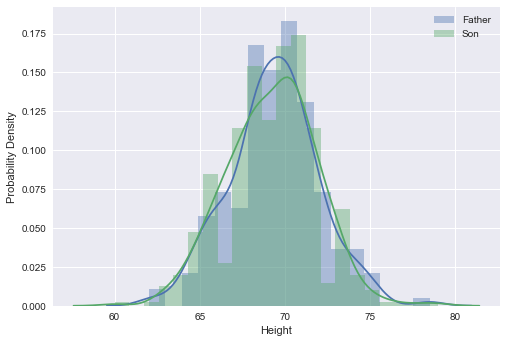

In [75]:
sns.distplot(father_distribution, label='Father')
sns.distplot(son_distribution, label='Son')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

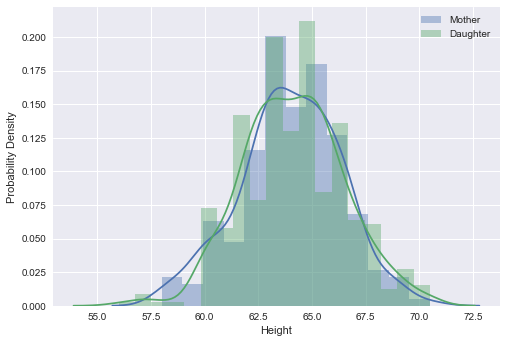

In [76]:
sns.distplot(mother_distribution, label='Mother')
sns.distplot(daughter_distribution, label='Daughter')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

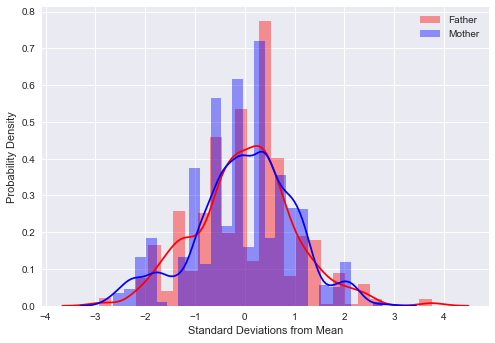

In [77]:
sns.distplot(galton_norm.Father, label='Father', color='red')
sns.distplot(galton_norm.Mother, label='Mother', color='blue')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

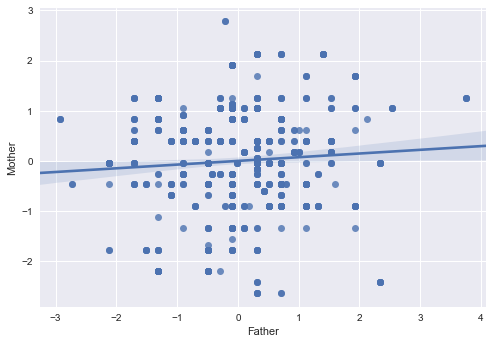

In [78]:
plt.xlabel('Father z-score')
plt.ylabel('Mother z-score')
sns.regplot(galton_norm.Father, galton_norm.Mother)
plt.show()

In [79]:
galton_norm

,Father,Mother,Parent,Offspring
0,3.751494,1.263788,2.507641,1.509041
1,3.751494,1.263788,2.507641,2.147322
2,3.751494,1.263788,2.507641,2.062945
3,3.751494,1.263788,2.507641,2.062945
4,2.537045,1.047058,1.792052,1.623040
...,...,...,...,...
893,-0.296670,0.396870,0.050100,-0.276949
894,-0.296670,0.396870,0.050100,-0.580947
895,-0.296670,0.396870,0.050100,-0.046475
896,-0.296670,0.396870,0.050100,-0.257417


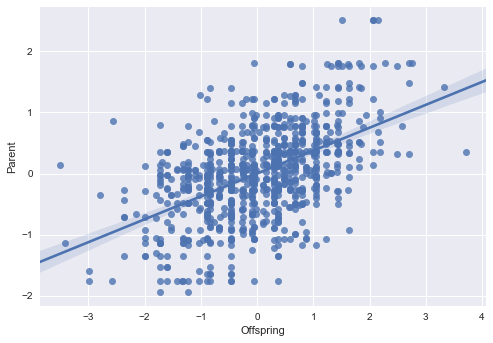

In [80]:
sns.regplot(galton_norm.Offspring, galton_norm.Parent)

In [81]:
galton_norm.corr()

,Father,Mother,Parent,Offspring
Father,1.000000,0.073665,0.732688,0.424994
Mother,0.073665,1.000000,0.732688,0.324175
Parent,0.732688,0.732688,1.000000,0.511247
Offspring,0.424994,0.324175,0.511247,1.000000


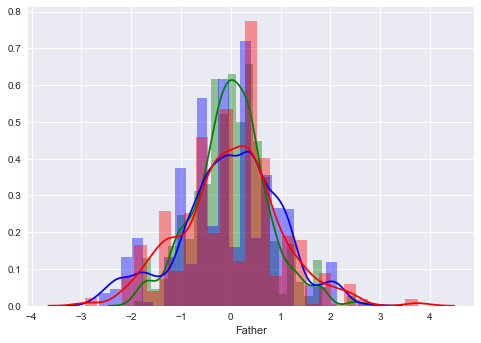

In [82]:
sns.distplot(galton_norm.Parent, color='green')
sns.distplot(galton_norm.Mother, color='blue')
sns.distplot(galton_norm.Father, color='red')


In [83]:
print(
galton_norm.Parent.std(),
galton_norm.Mother.std(),
galton_norm.Father.std(),
galton_norm.Offspring.std())

0.7326884096058295 0.9999999999999896 1.000000000000001 0.9994424309574889


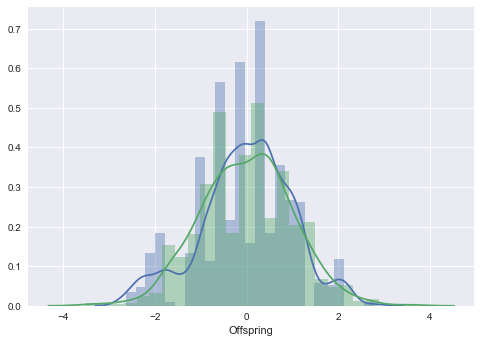

In [84]:
sns.distplot(galton_norm.Mother)
sns.distplot(galton_norm.Offspring)

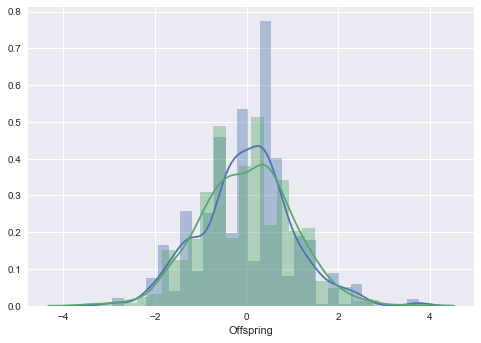

In [85]:
sns.distplot(galton_norm.Father)
sns.distplot(galton_norm.Offspring)

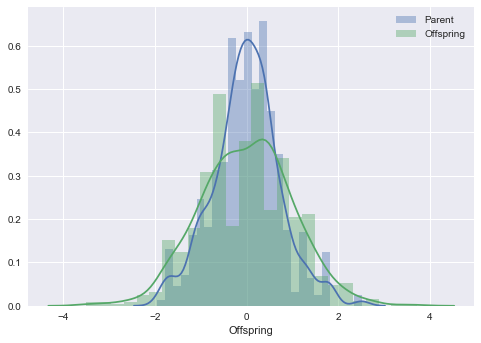

In [86]:
sns.distplot(galton_norm.Parent, label='Parent')
sns.distplot(galton_norm.Offspring, label='Offspring')
plt.legend()
plt.show()

In [87]:
print(galton_norm.Father.std(), 
galton_norm.Mother.std(),
galton_norm.Parent.std(),
galton_norm.Offspring.std())

1.000000000000001 0.9999999999999896 0.7326884096058295 0.9994424309574889


In [88]:
galton_norm

,Father,Mother,Parent,Offspring
0,3.751494,1.263788,2.507641,1.509041
1,3.751494,1.263788,2.507641,2.147322
2,3.751494,1.263788,2.507641,2.062945
3,3.751494,1.263788,2.507641,2.062945
4,2.537045,1.047058,1.792052,1.623040
...,...,...,...,...
893,-0.296670,0.396870,0.050100,-0.276949
894,-0.296670,0.396870,0.050100,-0.580947
895,-0.296670,0.396870,0.050100,-0.046475
896,-0.296670,0.396870,0.050100,-0.257417


### Using Galton's height data to answer the motivating question

In [89]:
import statistics
import numpy as np
import scipy.stats as st

In [90]:
parent = np.array(galton_norm.Parent.tolist())
offspring = np.array(galton_norm.Offspring.tolist())

In [91]:
sd_par = statistics.stdev(parent)

In [92]:
parent /= sd_par

In [93]:
statistics.stdev(parent)

1.0

In [94]:
statistics.stdev(offspring)

0.9994424309574893

My model said that 57% of the offspring above the 80th percentile are from parents below 80th percentile. Galton’s data got 61%.

In [96]:
N = len(offspring)

def to_percent(prop, digits):
    print(str(round(prop * 100, digits)) + '%')

    
def percent_error(approx, exact, digits=2):
    prop = abs(approx - exact) / exact
    return to_percent(prop, digits)


def att_below_percen(percentile):
    attributed_pars = list()
    for i in range(N):
        if offspring[i] >= st.norm.ppf(percentile):
            attributed_pars.append(parent[i])
    
    print(len(attributed_pars), 'attributable parents')
    
    count = 0
    for j in range(len(attributed_pars)):
        if attributed_pars[j] < st.norm.ppf(percentile):
            count += 1
    prop_from_below = count / len(attributed_pars)

    return prop_from_below

In [97]:
att_below_percen(0.8)

165 attributable parents


0.6060606060606061

My model said that 57% of the offspring above the 80th percentile are from parents below 80th percentile. Galton’s data got 61%.

In [98]:
percent_error(approx=0.57, exact=0.61)

6.56%


Percent error between proposed model and Galton's data for 80th percentile

In [99]:
att_below_percen(0.72)

263 attributable parents


0.5171102661596958

My model also said the equilibrium that 50% of the offspring above the 50th percentile are from parents below the 50th percentile. Glaton’s data got 52%.

In [100]:
percent_error(approx=0.52, exact=0.50)

4.0%


Percent error between proposed model and Galton's data for estimated equilibrium percentile

### Intergenerational mobility in Galton's height data

In [103]:
per_step = 0.2
step_percentile = list()

percent_groups = per_step + np.arange(0, 1, per_step)
num_groups = len(percent_groups)

for par_group_num in range(num_groups):  # parent group loop
    
    bins = list(np.zeros(num_groups))


    percentile_low = percent_groups[par_group_num] - per_step  # parent percentiles
    percentile_high = percent_groups[par_group_num]
    
    count_of_offspring = 0
    for i in range(N):
        if st.norm.ppf(percentile_low) <= parent[i] < st.norm.ppf(percentile_high):
            count_of_offspring += 1
            for off_group_num in range(num_groups):
                if st.norm.ppf(percent_groups[off_group_num] - per_step) <= offspring[i] \
                < st.norm.ppf(percent_groups[off_group_num]):
                    bins[off_group_num] += 1  # add to the bin 
    
    for bin_num in range(num_groups):
        bins[bin_num] /= count_of_offspring
    
    step_percentile.append(bins)
    
# in the transposed one, the bins represent offspring 
transposed_step_percentile = [[] for group_num in range(num_groups)]

for parent_bin_num in range(num_groups):
    for offspring_num in range(num_groups):
        to_append = step_percentile[parent_bin_num][offspring_num]
        transposed_step_percentile[offspring_num].append(to_append)

In [118]:
# imp.reload(tree)

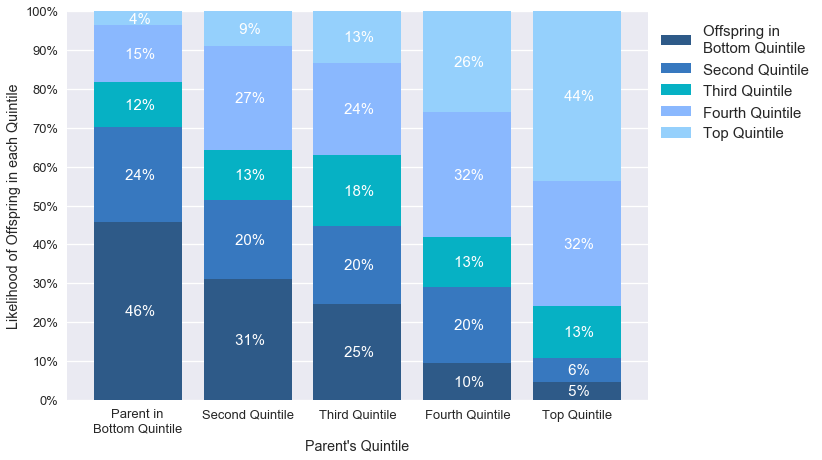

In [116]:
tree.plot_mobility(transposed_step_percentile)

R^2 of 0.81 between Galton's data and the proposed model. (Correlations are calculated in the correlation sheet.)